## Prediction of house price of USA

We're going to take the following approch:

1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Exprimentation

### 1. Problem defination:

In statement:
> This is the data set of house in US and we've to predict the price of the house based on this data set.

### 2. Data :
Here data is from kaggle.com : Link: https://www.kaggle.com/harlfoxem/housesalesprediction

### 3. Evaluation:
> At lest 90% accuracy is required.


### 4. Features:


* id: Unique id of the house.
* date: Date when data is taken.
* price: Price of the house.
* bedrooms: NO of bedrooms.
* bathrooms: No of bathrooms.
* sqft_living: Area of 
* sqft_lot
* floors
* waterfront
* view
* condition
* grade
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* zipcode
* lat
* long
* sqft_living15
* sqft_lot15


# 1. Preparing the tools:

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

# 2. Data Analysis

In [2]:
df = pd.read_csv('./housedata/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Data Exploration (EDA or ecploratory data analysis)
The goal here is to find out more about data and become a subjects matter exploration on the dataset you're working.

1. What question's are you trying too solve?
2. What kind of data do you have and how do we treat different types?
3. What's missing from the data and how do you deat with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of you data?

In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

#### 1. What question's are you trying to solve?
Regression problem, we've to predict the value of the house based on the features
                **[date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
               'floors', 'waterfront', 'view', 'condition', 'sqft_above',
               'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
               'statezip'].**
               
And predict the price.

#### 2. What kind of data do you have and how do we treat different types?

We have 4 object columns so we've to use OneHotEncoder for changing the object into the corresponding numerical values. And the `country` column is useless as all of them is from USA

#### 3. What's missing from the data and how do you deat with it?

In [4]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

No NaN values. Their might be 0 values in price columns...

Checking the 0 value in price column.

In [5]:
df.price.value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

There are 49 0 values in price columns. Hence, we have to clean price column.

In [6]:
# Checking for feature sqft_living:
df.sqft_living.value_counts()

1940    32
1720    32
1660    31
1840    31
2000    30
        ..
4200     1
4160     1
2015     1
2009     1
4110     1
Name: sqft_living, Length: 566, dtype: int64

In [7]:
# Checking for features sqft_lot:
df.sqft_lot.value_counts()

5000     80
6000     65
4000     54
7200     50
4800     29
         ..
1130      1
11367     1
5220      1
3171      1
18804     1
Name: sqft_lot, Length: 3113, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### EDA ( Exploratory data analysis)

In [10]:
df.bedrooms

0       3.0
1       5.0
2       3.0
3       3.0
4       4.0
       ... 
4595    3.0
4596    3.0
4597    3.0
4598    4.0
4599    3.0
Name: bedrooms, Length: 4600, dtype: float64

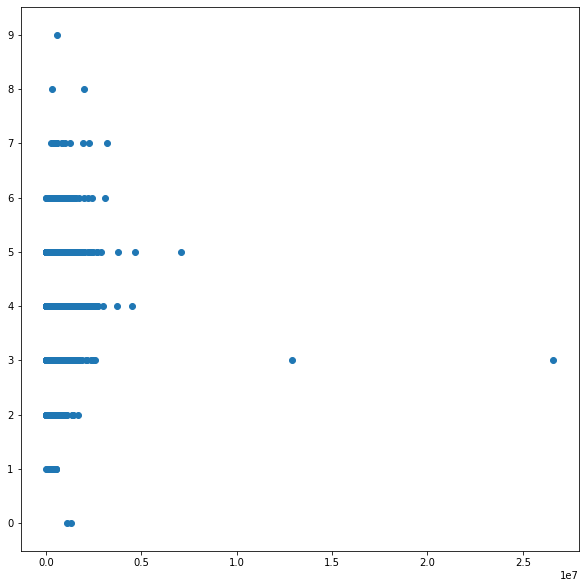

In [11]:
# Price vs. bedrooms
plt.figure(figsize=(10,10))

plt.yticks(np.arange(0, 10, 1))
plt.scatter( df.price,df.bedrooms)

In [12]:
df[df.price == df.price.max()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


Removing the 2 maximun price having the bedroom of 3.

In [13]:
indexOfmax = df[df.price == df.price.max()].index
df.drop(indexOfmax, inplace=True)

We've found that relation between bedrooms and price is unusual.

In [14]:
indexOfmax = df[df.price == df.price.max()].index
df.drop(indexOfmax, inplace=True)

Also removing the price 0. Rows.

In [15]:
indexZerosprice = df[df.price == 0].index
df.drop(indexZerosprice, inplace = True)

Showing the relation between Price and Bedrooms.

Text(0, 0.5, 'Bedrooms')

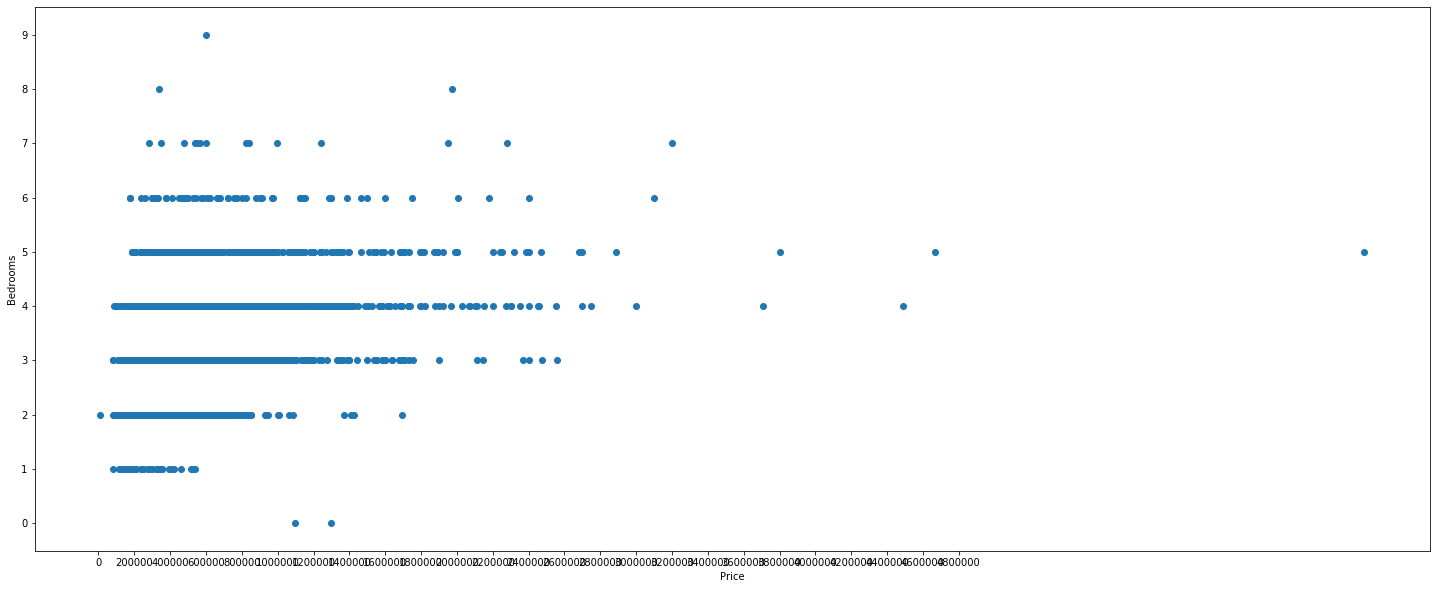

In [16]:
# Price vs. bedrooms
plt.figure(figsize=(25,10))

plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 5000000, 200000))
plt.scatter( df.price, df.bedrooms)
plt.xlabel('Price')
plt.ylabel('Bedrooms')

In [17]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Text(0, 0.5, 'square feet living')

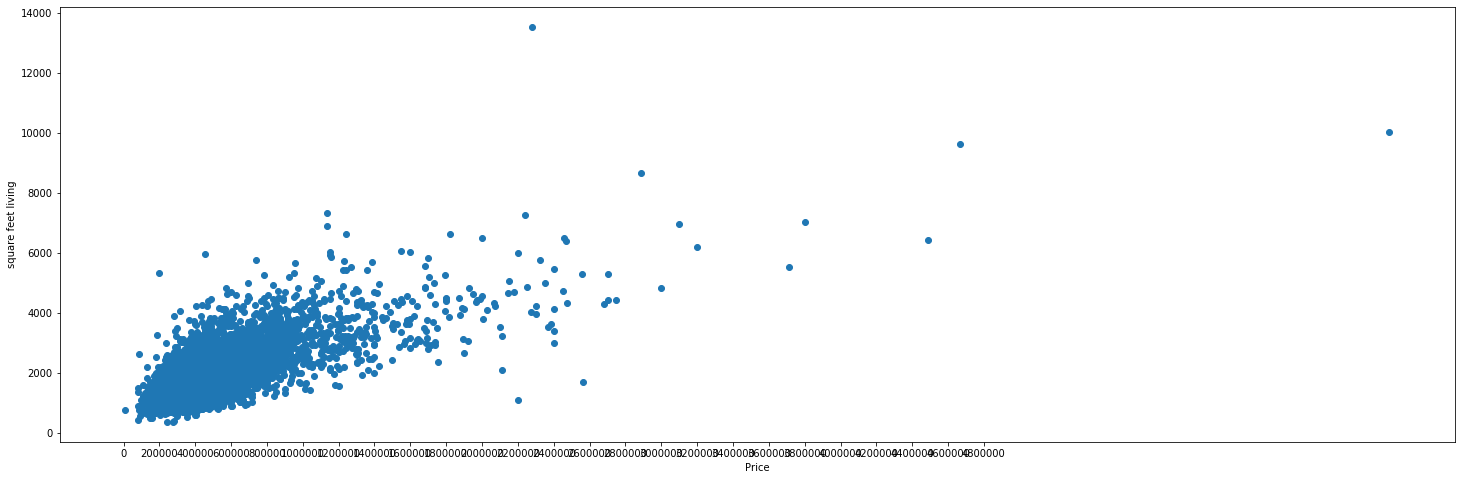

In [18]:
# Price vs. sqft_living
plt.figure(figsize=(25, 8))

plt.xticks(np.arange(0, 5000000, 200000))
plt.scatter(df.price, df.sqft_living)
plt.xlabel('Price')
plt.ylabel('square feet living')

In [19]:
df.condition.value_counts()

3    2850
4    1237
5     425
2      31
1       6
Name: condition, dtype: int64

Text(0, 0.5, 'Price')

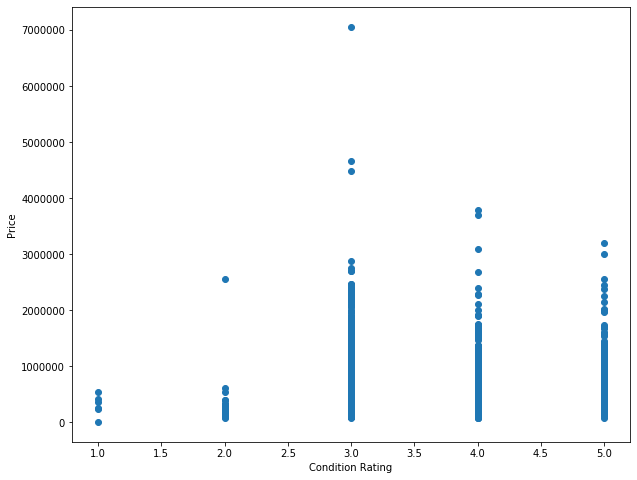

In [20]:
# Price vs . Condition
plt.figure(figsize=(10, 8))

plt.scatter( df.condition, df.price)
plt.xlabel('Condition Rating')
plt.ylabel('Price')

In [21]:
df.city.value_counts()

Seattle                1560
Renton                  291
Bellevue                281
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    183
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Covington                42
Duvall                   42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Vashon                   29
Tukwila                  29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Medina                   11
Fall City                11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific             

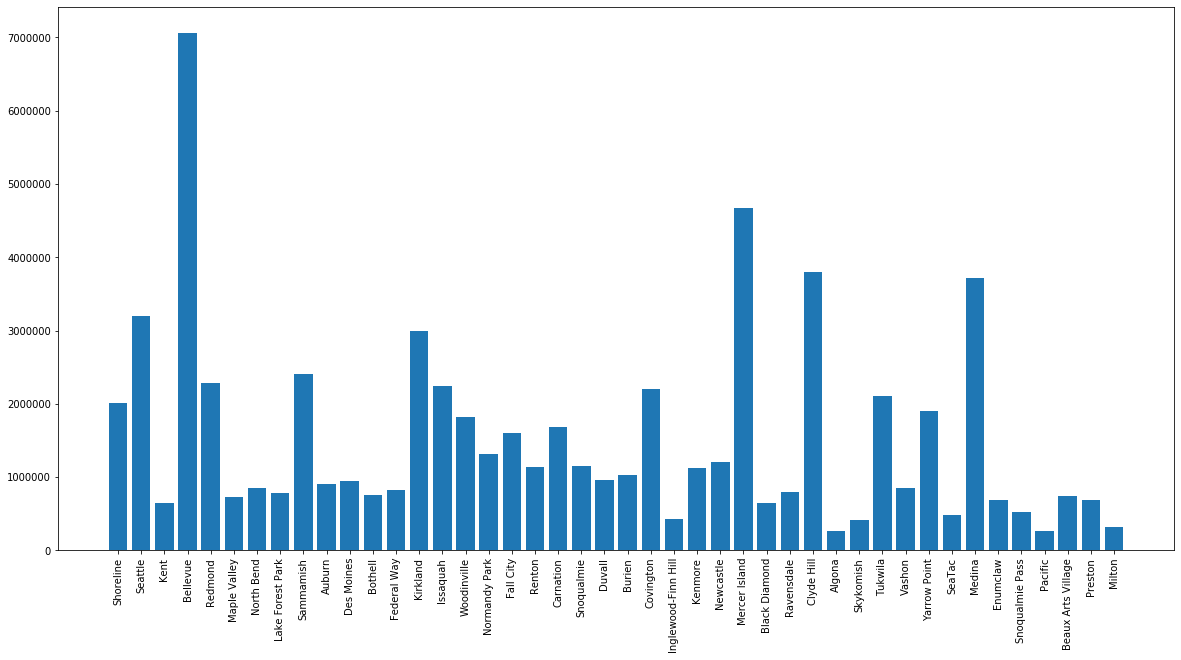

In [22]:
# Price vs. City
plt.figure(figsize=(20, 10))

plt.bar(df.city, df.price)
plt.xticks(rotation='vertical');

In [23]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [24]:
df.yr_built.value_counts()

2006    109
2005    103
2004     92
2007     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: yr_built, Length: 115, dtype: int64

<BarContainer object of 4549 artists>

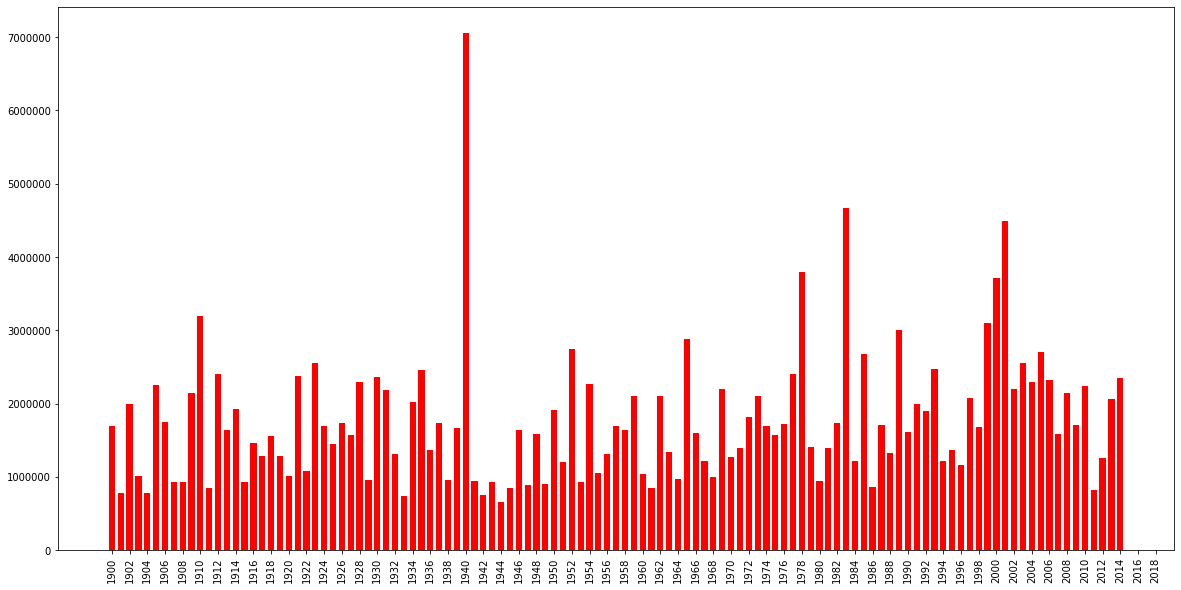

In [25]:
# Price vs. yr_built

plt.figure(figsize=(20, 10))

plt.xticks(np.arange(1900, 2020, 2), rotation='vertical')
plt.bar(df.yr_built, df.price, color='red', width=0.7)

In [26]:
df.street.value_counts()


2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11931 179th Pl NE        2
2358 Fairview Ave E      2
4924 SE 2nd Pl           2
                        ..
4206 SE Newport Way      1
3009 W Emerson St        1
20821 SE 135th St        1
1309 SW Webster St       1
3723 S Chicago St        1
Name: street, Length: 4474, dtype: int64

In [27]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

# 3. Modeling

The model is not numerical. So converting the object values into numerical values using onehotencoder.


Let's try out few different Regressor for the prediction.

1. Ridge
2. Linear Regression
3. SVM (linearSVC)
4. RandomForestRegressor

In [28]:
X = df.drop('price', axis=1)
y = df['price']

In [29]:
## 2. Using the encoder for the conversion of objects into numerical values

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['date', 'street', 'city', 'statezip', 'country']
transformer = ColumnTransformer([('one_hot', 
                                  OneHotEncoder(),
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<4549x4678 sparse matrix of type '<class 'numpy.float64'>'
	with 63287 stored elements in Compressed Sparse Row format>

In [30]:
transformed_X_data = pd.DataFrame(transformed_X.toarray())
transformed_X_data

,0,1,2,3,4,5,6,7,8,9,...,4668,4669,4670,4671,4672,4673,4674,4675,4676,4677
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0,1979.0
4545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983.0,2009.0
4546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0.0
4547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0.0


In [35]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
# Split X and y
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y ,test_size=0.2)

In [113]:
# Put models in a dictonary 
models = {
    'Ridge': Ridge(),
    'Linear Regression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor()
}

# Create a function to fit and socre models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and Evaluate given machine learning models.
    model: a dict of different sklearn learning models.
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictonary to keep model scores
    model_score = {}
    # Loop throught models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [114]:
model_score = fit_and_score(models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [115]:
model_score

{'Ridge': 0.7288786421061916,
 'Linear Regression': 0.7150756966723724,
 'RandomForestRegressor': 0.6725664436411467}

In [116]:
model_score_df = pd.DataFrame(model_score, index=['Accuracy'])

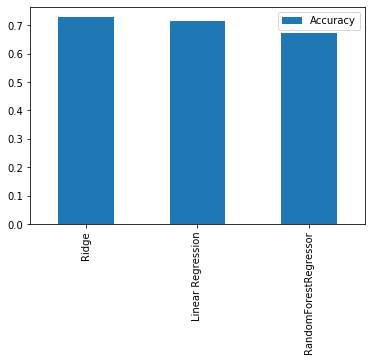

In [42]:
model_score_df.T.plot.bar()

In [126]:
grid_ridge = {
    'alpha': np.arange(6, 100, 1)
}

# Tuning the hyperparameter using randomizesearchCV

# For RandomForestRegressor
grid_random = {'n_estimators': np.arange(10, 20, 2)}
# grid_random = {'n_estimators': np.arange(10, 1000, 50),
#           'max_depth': [None, 3,5 ,10],
#           'min_samples_split': np.arange(2, 20, 2),
#           'min_samples_leaf': np.arange(1, 20, 2)
# }

In [127]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [128]:
# # Tuning RandomForestRegressor

# np.random.seed(42)

# randomizedSearch_rfr = RandomizedSearchCV(RandomForestRegressor(),
#                                         param_distributions = grid_random,
#                                         cv=5,
#                                         n_iter=20,
#                                         verbose=True)
# # Fiting the model 
# randomizedSearch_rfr.fit(X_train, y_train)

In [129]:
# Function for randomizedSearchCV

def randomizedSearch( model, X_train, X_test, y_train, y_test, param_dis, n_iter):
    """
    model: the estimator to tune using randomizedSearchCV
    X_train: traning set
    y_train: traning set
    X_test, y_test : testing set
    """
    for name, model in model.items():
        # RandomizeSearchCV for items
        randomizedSearchCV = RandomizedSearchCV(model, param_distributions=param_dis, cv=5, n_iter=10,
                                               verbose=True)
        # Fitting the model 
        randomizedSearchCV.fit(X_train, y_train)
        randomizedBestparams = randomizedSearchCV.best_params_
        randomizedSearch = randomizedSearchCV
    return randomizedBestparams, randomizedSearch # Return the best parameters and the randomizedSearch model

In [130]:
rd_bp, rd_S = randomizedSearch(model = {'Ridge': Ridge()},
                               X_train= X_train, 
                               y_train=y_train,
                               X_test= X_test, 
                               y_test=y_test,
                               param_dis=grid_ridge,
                               n_iter=10)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


In [131]:
rd_bp

{'alpha': 20}

In [132]:
rd_S

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [133]:
rd_S.score(X_test, y_test)
 # We found that the default Ridge function is way better than tuned one in this senario.

0.7365543655039155

In [135]:
rd_bp, rd_S = randomizedSearch(model = {'RandomForest': RandomForestRegressor()}, 
                               X_train= X_train, 
                               y_train=y_train, 
                               X_test= X_test, 
                               y_test=y_test, 
                               param_dis=grid_random, 
                               n_iter=3)

/home/samanshrestha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.1min finished


In [137]:
rd_bp, rd_S.score(X_test, y_test)

({'n_estimators': 18}, 0.5899599028156148)

The score is off the default score. So we are dropping the RandomForestRegressor

> Going throug Ridge regressor.

In [146]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

In [147]:
model = Ridge(alpha=20)
model.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [148]:
model.score(X_test, y_test)

0.7365543655039155

In [164]:
y_preds = model.predict(X_test)
y_preds

array([ 162551.54461073,  372012.3871629 ,  510235.9847075 ,
        790834.43414367,  579828.00302199, 1882324.95157389,
        601919.53863317,  650142.12848359,  868183.78295558,
        318117.59762039,  630873.22233948,  804641.59414667,
        474456.95669055,  422453.30696785, 1077229.5842438 ,
        489097.76923931,  652715.74066755,  432055.48623758,
        529799.78806392, 1538403.24054689,  398478.62573123,
        880859.52773538,  488443.25904359,  535508.6105318 ,
        529118.03673523,  240966.28657772,  849019.90406624,
        638462.12930222,  503595.20209638,  384502.39390584,
        483600.47191079,  433068.49453734,  459508.29120196,
        134940.66197679,  360860.21204879,  946379.16008533,
        181701.69794951,  426892.14219604,  633149.013755  ,
        696641.02676147,  814511.30681709,  321413.23797757,
       1129669.05526249,  412853.74671817,  552947.68062079,
        300332.70472111,  532020.21075627,   76050.83472186,
        520437.3986291 ,

In [171]:
y_test

1512    1.869500e+05
4586    4.302778e+05
179     5.200000e+05
2184    7.400000e+05
2053    5.700000e+05
            ...     
490     4.100000e+05
2520    7.350000e+05
862     1.216000e+06
3794    9.525000e+05
4060    8.750000e+05
Name: price, Length: 910, dtype: float64

In [172]:
# Showing the data 
for i in range(0,20):
    print(f'Predicted Values: {y_preds[i]} and Actual Value: {y_test.iloc[i]}')

Predicted Values: 162551.5446107313 and Actual Value: 186950.0
Predicted Values: 372012.38716290356 and Actual Value: 430277.777778
Predicted Values: 510235.98470749706 and Actual Value: 520000.0
Predicted Values: 790834.4341436735 and Actual Value: 740000.0
Predicted Values: 579828.0030219902 and Actual Value: 570000.0
Predicted Values: 1882324.9515738895 and Actual Value: 3200000.0
Predicted Values: 601919.5386331724 and Actual Value: 612500.0
Predicted Values: 650142.1284835939 and Actual Value: 615000.0
Predicted Values: 868183.7829555837 and Actual Value: 736500.0
Predicted Values: 318117.59762039245 and Actual Value: 328500.0
Predicted Values: 630873.222339477 and Actual Value: 625000.0
Predicted Values: 804641.5941466714 and Actual Value: 790000.0
Predicted Values: 474456.9566905461 and Actual Value: 580000.0
Predicted Values: 422453.3069678523 and Actual Value: 435000.0
Predicted Values: 1077229.5842437989 and Actual Value: 835000.0
Predicted Values: 489097.7692393109 and Actua